# **Explorative analysis of CDSS data from Rwanda**

Please note the usage of the following abbrevations:
- RW = Rw = Rwanda
- hf = healthcare facility
- ...

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
import sys
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install thefuzz
!{sys.executable} -m pip install pyshp

You should consider upgrading via the 'c:\Users\sidla\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\sidla\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\sidla\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Import data and get overview

In [138]:
# import raw data
raw_rw_data = pd.read_csv("data/rwanda/13-02-2023-export_flat/answers.csv", warn_bad_lines=True, error_bad_lines=False)
raw_rw_data

b'Skipping line 9087: expected 2025 fields, saw 2028\n'


,medical_case_id,medical_case_local_id,medical_case_consent,medical_case_isEligible,medical_case_redcap,medical_case_consultation_date,medical_case_closed_at,medical_case_force_close,medical_case_redcap_flag,medical_case_duplicate,...,DRUG - ampicillin im [for infants under 2 months old] (at-facility when referral is not feasible) - 5936,DRUG - gentamicin im [for infants under 2 months old](at-facility when referral not feasible) - 5393,DRUG - azithromycin po - 5871,DRUG - amoxicillin hd po (syrup) - 22761,DRUG - ampicillin + cloxacillin (ampiclox) po - 5325,DRUG - epinephrine (adrenaline) im - 5909,DRUG - dextrose iv bolus - 5942,DRUG - amoxicillin / clavulanic acid iv - 5920,DRUG - Antibiotic prescribed ?,custom_drugs
0,7,236b5efb-a55d-457b-838f-6aaf8cb8bc1c,1,NaN,1,2021-08-12 16:10:53,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,8,61e8ca0f-ae96-4bf4-a0d0-cdd010f0375a,1,NaN,1,2021-08-12 16:10:56,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,9,7ceb68de-1a3a-4f19-94b5-0f8c5b67bd05,1,NaN,1,2021-08-12 16:11:00,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,10,a473563c-9207-475c-aa16-a93dea8cb729,1,NaN,1,2021-08-12 16:11:04,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,11,bb129051-fc4c-4142-be6b-4b0258f65b93,1,NaN,1,2021-08-12 16:11:07,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87572,89937,1106a8e6-7ad5-4f11-867d-d5f8a6d73b39,1,NaN,1,2023-02-06 08:28:25,2023-02-06 20:30:30,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
87573,89938,334cb4eb-4040-4140-b605-b0efb4f5a45d,1,NaN,1,2023-02-06 08:31:02,2023-02-06 20:32:13,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
87574,89939,35c2a3d1-997d-4c9b-aee0-a413e0be8cb4,1,NaN,1,2023-02-07 10:21:58,2023-02-07 22:24:11,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
87575,89940,4e6dd03f-a5ed-4894-9cad-4fc126fcaa6a,1,NaN,1,2023-02-06 08:04:54,2023-02-06 20:06:28,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [139]:
# print column names an their data type
for col in raw_rw_data.columns:
    print("col:",col,"- dtype:",raw_rw_data.dtypes[col])

col: medical_case_id - dtype: int64
col: medical_case_local_id - dtype: object
col: medical_case_consent - dtype: int64
col: medical_case_isEligible - dtype: float64
col: medical_case_redcap - dtype: int64
col: medical_case_consultation_date - dtype: object
col: medical_case_closed_at - dtype: object
col: medical_case_force_close - dtype: float64
col: medical_case_redcap_flag - dtype: int64
col: medical_case_duplicate - dtype: int64
col: medical_case_is_drop - dtype: int64
col: medical_case_app_version - dtype: float64
col: patient_id - dtype: int64
col: patient_birthdate - dtype: int64
col: patient_gender - dtype: object
col: patient_local_patient_id - dtype: object
col: patient_consent - dtype: object
col: patient_redcap - dtype: int64
col: patient_duplicate - dtype: int64
col: patient_other_uid - dtype: object
col: patient_other_study_id - dtype: object
col: patient_other_group_id - dtype: float64
col: patient_merged_with - dtype: object
col: patient_is_drop - dtype: int64
col: pati

In [140]:
nunique_rw_data = raw_rw_data.nunique().to_frame(name="nunique")

# binary columns
nunique_rw_data[nunique_rw_data["nunique"] == 2]

,nunique
medical_case_consent,2
medical_case_redcap,2
medical_case_force_close,2
medical_case_duplicate,2
medical_case_is_drop,2
...,...
DRUG - zinc sulfate po - 8429,2
DRUG - oral rehydration salts (ors) po - 8427,2
DRUG - multivitamin - 8430,2
DRUG - iv fluid (ringer lactate) - 7751,2


In [141]:
# categorical columns

# Data selection
Only pick columns relevant for the spatio-temporal clustering of symptoms. Relevant columns are:
1. time = "medical_case_consultation_date"
2. space
    - hf location = "health_facility_longitude" & "health_facility_latitude"
    - location of patient's home: "BD9 - Village (Umudugudu) - 8062"
3. demographic: 
    - age = "patient_birthdate"
    - sex = "patient_gender"
    - columns with BD in the beginning
    - columns with BM in the beginning
    - diagnosis (= potential labels for clusters) = columns with DF (, CH, A) in the beginning
4. symptoms = columns with CC, PE, S, OS, A in the beginning

In [142]:
# select relevant columns
columns_to_keep = [
    "medical_case_id",
    "medical_case_consultation_date",
    "patient_id",
    "patient_birthdate",
    "patient_gender",
    "health_facility_id",
    "health_facility_group_id",
    "health_facility_longitude",
    "health_facility_latitude",
    "health_facility_name"
]

# Quality control: checking for anomalies in data

In [143]:
description_raw_rw_data = raw_rw_data.describe()
description_raw_rw_data 

,medical_case_id,medical_case_consent,medical_case_isEligible,medical_case_redcap,medical_case_force_close,medical_case_redcap_flag,medical_case_duplicate,medical_case_is_drop,medical_case_app_version,patient_id,...,DRUG - gentamicin im [for infants under 2 months old] [at-facility when referral not feasible - critical illness) - 5934,DRUG - ampicillin im [for infants under 2 months old] (at-facility when referral is not feasible) - 5936,DRUG - gentamicin im [for infants under 2 months old](at-facility when referral not feasible) - 5393,DRUG - azithromycin po - 5871,DRUG - amoxicillin hd po (syrup) - 22761,DRUG - ampicillin + cloxacillin (ampiclox) po - 5325,DRUG - epinephrine (adrenaline) im - 5909,DRUG - dextrose iv bolus - 5942,DRUG - amoxicillin / clavulanic acid iv - 5920,DRUG - Antibiotic prescribed ?
count,87577.000000,87577.000000,0.0,87577.000000,86668.000000,87577.0,87577.000000,87577.000000,0.0,87577.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87577.000000
mean,46015.872135,0.999954,NaN,0.999954,0.296015,0.0,0.006223,0.003334,NaN,30895.085947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245384
std,25440.931820,0.006758,NaN,0.006758,0.456500,0.0,0.078641,0.057647,NaN,18030.192427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.430317
min,7.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,24114.000000,1.000000,NaN,1.000000,0.000000,0.0,0.000000,0.000000,NaN,14983.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,46104.000000,1.000000,NaN,1.000000,0.000000,0.0,0.000000,0.000000,NaN,29911.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,68036.000000,1.000000,NaN,1.000000,1.000000,0.0,0.000000,0.000000,NaN,46193.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,89941.000000,1.000000,NaN,1.000000,1.000000,0.0,1.000000,1.000000,NaN,64783.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Low variance columns

<AxesSubplot:title={'center':'Low variance columns in rw data set'}>

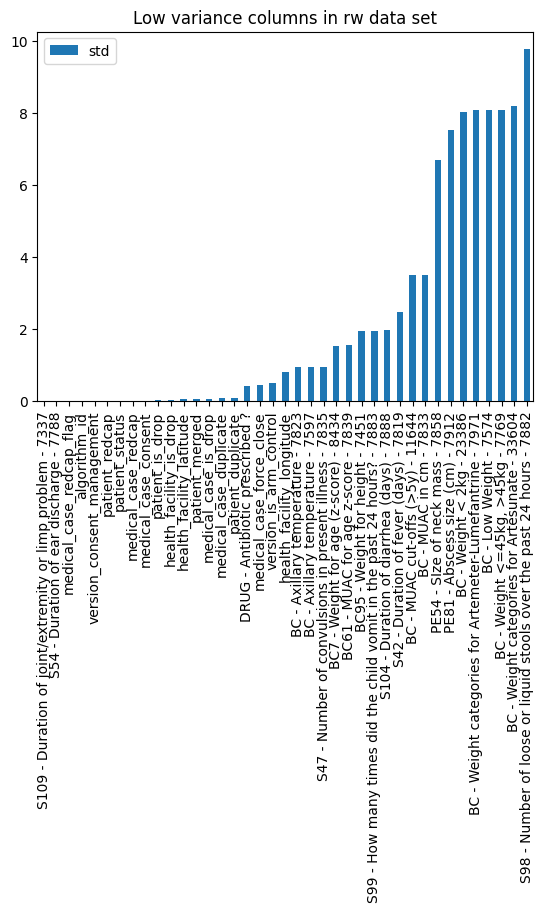

In [144]:
# check for low variance columns
low_var_threshold = 10 # TODO should be different for binary columns
var_rw_data = description_raw_rw_data.loc[["std"]].transpose().dropna().sort_values(by=["std"])

# plot low variance columns
var_rw_data[var_rw_data["std"] <= low_var_threshold].plot(kind="bar", rot=90, title="Low variance columns in rw data set")

## Missingness of columns

In [145]:
# number of nan per column
nnan_rw_data = raw_rw_data.isnull().sum(axis = 0).to_frame(name="nnan")


In [146]:
# columns with no nan
print(nnan_rw_data[nnan_rw_data["nnan"] == 0].size/nnan_rw_data.size*100, "%", "of columns contain no NaN values!")
nnan_rw_data[nnan_rw_data["nnan"] == 0]

2.4691358024691357 % of columns contain no NaN values!


,nnan
medical_case_id,0
medical_case_local_id,0
medical_case_consent,0
medical_case_redcap,0
medical_case_consultation_date,0
medical_case_redcap_flag,0
medical_case_duplicate,0
medical_case_is_drop,0
patient_id,0
patient_birthdate,0


96.64197530864197 % of columns contain more than 20 % of NaN values!


<AxesSubplot:title={'center':'Columns with more than 20% of NaN values'}>

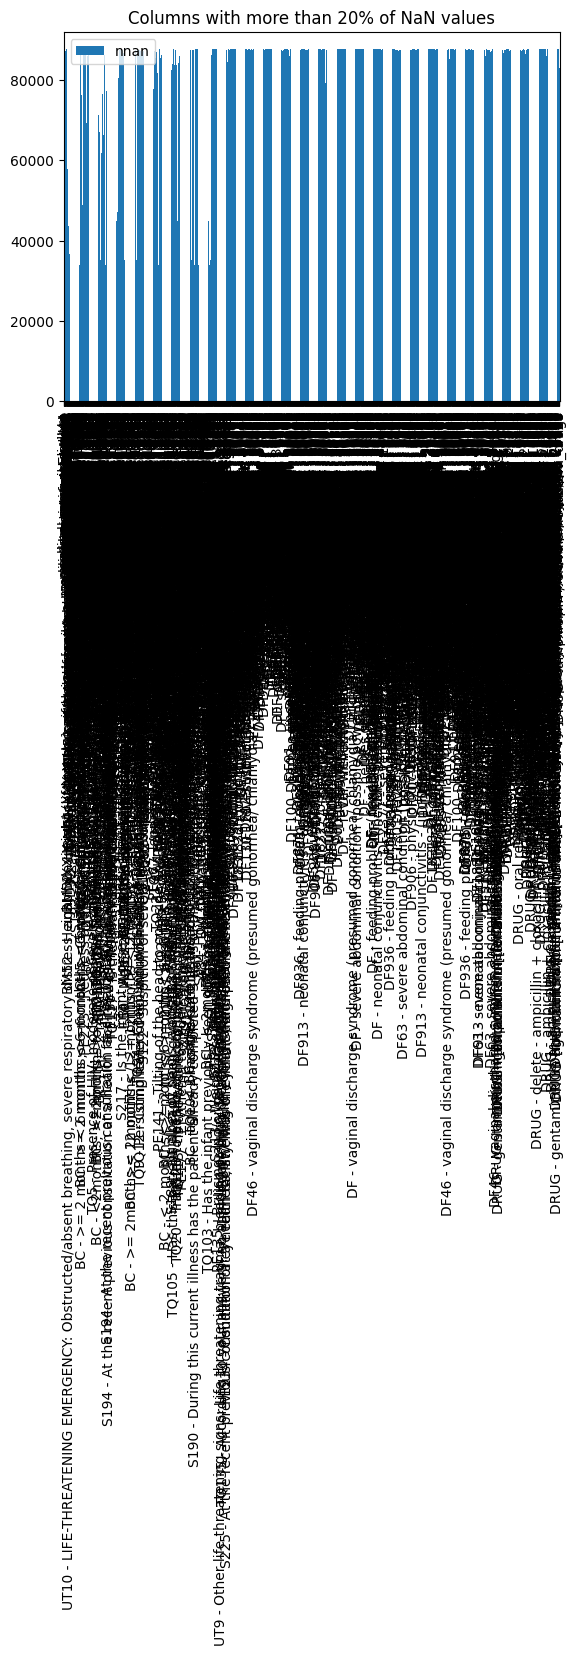

In [147]:
# plot columns with too many NaN values
nnan_threshold = 20 # in %
print(nnan_rw_data[nnan_rw_data["nnan"] / nnan_rw_data.size * 100 > nnan_threshold].size / nnan_rw_data.size * 100, "%", "of columns contain more than", nnan_threshold,"%", "of NaN values!")
nnan_rw_data[nnan_rw_data["nnan"] / nnan_rw_data.size * 100 > nnan_threshold].plot(kind="bar", rot=90, title=f"Columns with more than {nnan_threshold}% of NaN values")

### Conclusion - Missingness
- columns for time (= "medical_case_consultation_date") and space (= health_facility_name, longitude and latitude) are not missing any values 
- since the majority of data comes from a decision tree to capture the patient state, it is clear that there are columns with a lot of NaN values

# Data cleaning

In [148]:
rw_data = raw_rw_data.copy()

## Mandatory cleaning according to domain experts

#### cleaning is done based on this R code:
----
    ## Filter to keep only non-test health facilities
    med_cases <- med_cases %>%  filter(health_facility_group_id == 128 | health_facility_group_id == 129 | health_facility_group_id == 132 |
                            health_facility_group_id == 133 | health_facility_group_id == 140 | health_facility_group_id == 126 |
                            health_facility_group_id == 130 | health_facility_group_id == 131 | health_facility_group_id == 138 |
                            health_facility_group_id == 171 | health_facility_group_id == 106 | health_facility_group_id == 108 |
                            health_facility_group_id == 117 | health_facility_group_id == 135 | health_facility_group_id == 137 |
                            health_facility_group_id == 103 | health_facility_group_id == 114 | health_facility_group_id == 115 |
                            health_facility_group_id == 116 | health_facility_group_id == 125 | health_facility_group_id == 104 |
                            health_facility_group_id == 105 | health_facility_group_id == 109 | health_facility_group_id == 118 |
                            health_facility_group_id == 120 | health_facility_group_id == 122 | health_facility_group_id == 107 |
                            health_facility_group_id == 110 | health_facility_group_id == 111 | health_facility_group_id == 112 |
                            health_facility_group_id == 119 | health_facility_group_id == 121)
    ## Create study arm label
    med_cases$arm <- med_cases$health_facility_group_id
    med_cases$arm[med_cases$health_facility_group_id %in% c(128,129,132,133,140,106,108,117,135,137,104,105,109,118,120,122)] <- "Control"
    med_cases$arm[med_cases$health_facility_group_id %in% c(126,130,131,138,171,103,114,115,116,125,107,110,111,112,119,121)] <- "Intervention"
    ## Create group id label
    med_cases$group <- med_cases$health_facility_group_id
    med_cases$group[med_cases$health_facility_group_id %in% c(128,129,132,133,140,126,130,131,138,171)] <- "Group 1"
    med_cases$group[med_cases$health_facility_group_id %in% c(106,108,117,135,137,103,114,115,116,125)] <- "Group 2"
    med_cases$group[med_cases$health_facility_group_id %in% c(104,105,109,118,120,122,107,110,111,112,119,121)] <- "Group 3"
    ## Drop test cases, etc. 
    med_cases <- med_cases %>% filter(med_cases$medical_case_duplicate == 0 &
                                    med_cases$medical_case_is_drop == 0)
    ## Group 1 - intervention arm (December 2021 to present)
    med_cases_grp1_i <- med_cases %>% filter(
                        medical_case_consultation_date >= "2021-12-01" &
                        group == "Group 1" & arm == "Intervention")
    ## Group 1 - control arm (June 2022 to present)
    med_cases_grp1_c <- med_cases %>% filter(
                        medical_case_consultation_date >= "2022-06-01" &
                        group == "Group 1" & arm == "Control")
    ## Group 2 - intervention arm (March 2022 to present)
    med_cases_grp2_i <- med_cases %>% filter(
    medical_case_consultation_date >= "2022-03-01" &
        group == "Group 2" & arm == "Intervention")
    ## Group 2 - control arm (September 2022 to present)
    med_cases_grp2_c <- med_cases %>% filter(
    medical_case_consultation_date >= "2022-09-01" &
        group == "Group 2" & arm == "Control")
    ## Group 3 - intervention arm (June 2022 to present)
    med_cases_grp3_i <- med_cases %>% filter(
    medical_case_consultation_date >= "2022-06-01" &
        group == "Group 3" & arm == "Intervention")
    ## Group 3 - control arm (December 2022 to present)
    med_cases_grp3_c <- med_cases %>% filter(
    medical_case_consultation_date >= "2022-12-01" &
        group == "Group 3" & arm == "Control")
    ## Merge the datasets
    med_cases <- rbind(med_cases_grp1_i,med_cases_grp1_c,
                    med_cases_grp2_i, med_cases_grp2_c,
                    med_cases_grp3_i, med_cases_grp3_c)


In [149]:
# Filter to keep only non-test health facilities
string_of_filter_code_in_r = "filter(health_facility_group_id == 128 | health_facility_group_id == 129 | health_facility_group_id == 132 | health_facility_group_id == 133 | health_facility_group_id == 140 | health_facility_group_id == 126 |health_facility_group_id == 130 | health_facility_group_id == 131 | health_facility_group_id == 138 |health_facility_group_id == 171 | health_facility_group_id == 106 | health_facility_group_id == 108 |health_facility_group_id == 117 | health_facility_group_id == 135 | health_facility_group_id == 137 |health_facility_group_id == 103 | health_facility_group_id == 114 | health_facility_group_id == 115 |health_facility_group_id == 116 | health_facility_group_id == 125 | health_facility_group_id == 104 |health_facility_group_id == 105 | health_facility_group_id == 109 | health_facility_group_id == 118 |health_facility_group_id == 120 | health_facility_group_id == 122 | health_facility_group_id == 107 |health_facility_group_id == 110 | health_facility_group_id == 111 | health_facility_group_id == 112 |health_facility_group_id == 119 | health_facility_group_id == 121)"
group_id_non_test_hfs = [int(s) for s in string_of_filter_code_in_r.split() if s.isdigit()] #refers to "health_facility_group_id"
rw_data = rw_data[rw_data["health_facility_group_id"].isin(group_id_non_test_hfs)]

In [150]:
print("remaining hf in dataset (hf_group_id):", np.sort(rw_data["health_facility_group_id"].unique()))

remaining hf in dataset (hf_group_id): [103 104 105 106 107 108 109 110 111 112 114 115 116 117 118 119 120 122
 125 126 128 129 130 131 132 133 135 137 138 140 171]


In [151]:
# Drop test cases, etc. 
rw_data = rw_data.loc[(rw_data["medical_case_duplicate"] == 0) & (rw_data["medical_case_is_drop"] == 0)]

### Get only consultations part of the intervention period of each group (Group 1 - 3)
![Red are the relevant consultations](data/rwanda/graph_relevant_consultations.JPG)

In [152]:
# Create study arm label
control_hfs = [128,129,132,133,140,106,108,117,135,137,104,105,109,118,120,122]
intervention_hfs = [126,130,131,138,171,103,114,115,116,125,107,110,111,112,119,121]

rw_data["arm"] = ["control" if group_id in control_hfs else "intervention" for group_id in rw_data["health_facility_group_id"]]

In [153]:
# Create group id label
group1_hfs = [128,129,132,133,140,126,130,131,138,171]
group2_hfs = [106,108,117,135,137,103,114,115,116,125]
group3_hfs = [104,105,109,118,120,122,107,110,111,112,119,121]

rw_data["group"] = [1 if group_id in group1_hfs else 2 if group_id in group2_hfs else 3 for group_id in rw_data["health_facility_group_id"]]

In [154]:
# filter for consultation part of the intervention period
rw_data["intervention_period_start"] = "2021-12-01" # intervetnion period start for group 1 of intervention arm
rw_data.loc[(rw_data["arm"] == "intervention") & (rw_data["group"] == 2), "intervention_period_start"] = "2022-03-01"
rw_data.loc[(rw_data["arm"] == "intervention") & (rw_data["group"] == 3), "intervention_period_start"] = "2022-06-01"
rw_data.loc[(rw_data["arm"] == "control") & (rw_data["group"] == 1), "intervention_period_start"] = "2022-06-01"
rw_data.loc[(rw_data["arm"] == "control") & (rw_data["group"] == 2), "intervention_period_start"] = "2022-09-01"
rw_data.loc[(rw_data["arm"] == "control") & (rw_data["group"] == 3),"intervention_period_start"] = "2022-12-01"

rw_data = rw_data[rw_data["intervention_period_start"] <= rw_data["medical_case_consultation_date"]]

### Clean column: "BD9 - Village (Umudugudu) - 8062" (= origin of patient)

Since the origin of a patient that seeked a consultation is inputted manually in the CDSS, diverse errors (e. g. spelling mistake, incomplete description etc.) need to be considered. Based on the experience of the domain experts, we agreed on the following data cleaning methodology to be the best:
1. drop consultations without record of patient's origin
2. normalise the inputted patient's origin
    - remove whitespaces
    - lowercase
    - remove coma (= making each value of the column a single string of village, cell, sector and district)
3. validate precision of the inputted patient's origin by comparing it to the village master list, a excel file provided by domain experts that contains all villages in Rwanda with correct description of the village using village, cell, sector and district as descriptive terms.
    - if the inputted patient's origin does not match one village in the master list, it will be replaced by the village from the master list which equals the closest (= fuzzy search).
    - if the inputted patient's origin is only one word and it does not match one village in the master list, it will be corrected based on a fuzzy search on the catchment area of the hf where the consultation was held.

In [155]:
# filter out consultations with patients whose origin is not known (=NaN)
print("number of consultations without record of patient's origin:", sum(rw_data["BD9 - Village (Umudugudu) - 8062"].isna()))
rw_data = rw_data.dropna(subset=["BD9 - Village (Umudugudu) - 8062"])

number of consultations without record of patient's origin: 0


In [156]:
# normalise village column (remove whitespace and lowercase everything)
rw_data["BD9 - Village (Umudugudu) - 8062"] =  rw_data["BD9 - Village (Umudugudu) - 8062"].str.replace(" ", "")
rw_data["BD9 - Village (Umudugudu) - 8062"] =  rw_data["BD9 - Village (Umudugudu) - 8062"].str.lower()

In [157]:
# import records of all rw villages in their complete description (provided by domain experts)
village_master = pd.read_excel("data/rwanda/village/Village_master_list.xlsx")

# only keep villages in districts rusizi and nyamasheke as these are the only considered districts of the current study (according to domain expert)
village_master = village_master.loc[(village_master["District_Name"] == "Rusizi") | (village_master["District_Name"] == "Nyamasheke")]

# normalise village description: lowercase everything
village_master = village_master.applymap(lambda s: s.lower() if type(s) == str else s)
village_master

,District_Name,Sector_Name,Cell_Name,Village_Name
6866,rusizi,kamembe,kamurera,gikombe
6867,rusizi,kamembe,kamurera,kamuhirwa
6868,rusizi,kamembe,kamurera,murangi
6869,rusizi,kamembe,ruganda,kadashya
6870,rusizi,kamembe,ruganda,kamubaji
...,...,...,...,...
8345,nyamasheke,shangi,shangi,gasharu
8346,nyamasheke,shangi,shangi,kabere
8347,nyamasheke,shangi,shangi,karambo
8348,nyamasheke,shangi,shangi,ngoboka


#### Analysis of correctness of patient's origin as inputted in CDSS

In [158]:
v = rw_data.copy()

# count how many words were inputted in CDSS tool by clinician to describe patient's origin
v["count_desc_values"] = [ len(village.split(",")) for village in rw_data["BD9 - Village (Umudugudu) - 8062"]]

# how many consultations have how many descriptive terms for their respective patient's origin
v.groupby("count_desc_values")["medical_case_id"].count().reset_index(name="number_consultations")

,count_desc_values,number_consultations
0,1,656
1,2,18
2,3,96
3,4,47318
4,5,19


In [159]:
# create one word for the village description as inputted in CDSS tool
v["village_one_word"] = rw_data["BD9 - Village (Umudugudu) - 8062"].str.replace(",", "")

# create one word for the village description in the village master list
village_master["village_one_word"] = village_master["Village_Name"] + village_master["Cell_Name"] + village_master["Sector_Name"] + village_master["District_Name"]
village_master

,District_Name,Sector_Name,Cell_Name,Village_Name,village_one_word
6866,rusizi,kamembe,kamurera,gikombe,gikombekamurerakamemberusizi
6867,rusizi,kamembe,kamurera,kamuhirwa,kamuhirwakamurerakamemberusizi
6868,rusizi,kamembe,kamurera,murangi,murangikamurerakamemberusizi
6869,rusizi,kamembe,ruganda,kadashya,kadashyarugandakamemberusizi
6870,rusizi,kamembe,ruganda,kamubaji,kamubajirugandakamemberusizi
...,...,...,...,...,...
8345,nyamasheke,shangi,shangi,gasharu,gasharushangishanginyamasheke
8346,nyamasheke,shangi,shangi,kabere,kabereshangishanginyamasheke
8347,nyamasheke,shangi,shangi,karambo,karamboshangishanginyamasheke
8348,nyamasheke,shangi,shangi,ngoboka,ngobokashangishanginyamasheke


In [160]:
# merge rw data with village master list to identify the correctness of the inputted patient's origin
v = v.merge(village_master, on="village_one_word", how="left")

In [161]:
# get consultations with correctly inputted patient's origin
v_with_correct_village_desc = v[~v["Village_Name"].isna()]
print("Share of consultation with correct village description (in %):", v_with_correct_village_desc.shape[0]/v.shape[0]*100)

Share of consultation with correct village description (in %): 96.3996923524643


In [180]:
# get consultations with wrongly inputted patient's origin but with more than one descriptive term
v_with_more_than_two_desc_term_but_no_match = v[(~( (v["count_desc_values"] == 1) | (v["count_desc_values"] == 2) )) & (v["Village_Name"].isna())] 
v_with_more_than_two_desc_term_but_no_match[['count_desc_values', 'village_one_word', 'Village_Name', 'Cell_Name', 'Sector_Name', 'District_Name']]

,count_desc_values,village_one_word,Village_Name,Cell_Name,Sector_Name,District_Name
3,4,cyirabyobgahingamurururusizi,NaN,NaN,NaN,NaN
12,4,rubengaiikagaragihundwerusizi,NaN,NaN,NaN,NaN
15,4,cyirabyoagahingamurururusizi,NaN,NaN,NaN,NaN
18,4,cyirabyobgahingamurururusizi,NaN,NaN,NaN,NaN
22,4,cyirabyoagahingamurururusizi,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
47945,4,ruhingaikagatamubushengenyamasheke,NaN,NaN,NaN,NaN
47948,4,cyirabyobgahingamurururusizi,NaN,NaN,NaN,NaN
47950,4,cyirabyobgahingamurururusizi,NaN,NaN,NaN,NaN
48083,4,ruhingaikagatamubushengenyamasheke,NaN,NaN,NaN,NaN


In [181]:
# how many consultations with wrong village description have how many descriptive terms for their respective patient's origin
v_with_more_than_two_desc_term_but_no_match.groupby("count_desc_values")["medical_case_id"].count().reset_index(name="number_consultations")

,count_desc_values,number_consultations
0,3,53
1,4,1036
2,5,9


#### Correcting wrongly inputted patient's origin with more than two descriptive term

In [182]:
# perform fuzzy search for inputted patient's origin which do not have an exact match but more than one term to describe the village
from thefuzz import fuzz

def fuzzy_search(village):
    closeness_score = [fuzz.ratio(village, v) for v in village_master["village_one_word"]]
    max_value = max(closeness_score)
    max_index = closeness_score.index(max_value)
    best_match = village_master.iloc[max_index].values
    return (max_index, max_value, best_match)

In [183]:
v_with_more_than_two_desc_term_but_no_match["fuzzy_search_result"] = v_with_more_than_two_desc_term_but_no_match.apply(lambda row: fuzzy_search(row.village_one_word), axis=1)

In [184]:
# viewing fuzzy search results
# NOTE: the order of the description of a village in the master list is: District, Sector, Cell, Village
v_with_more_than_two_desc_term_but_no_match[["BD9 - Village (Umudugudu) - 8062", "fuzzy_search_result"]]

,BD9 - Village (Umudugudu) - 8062,fuzzy_search_result
3,"cyirabyob,gahinga,mururu,rusizi","(390, 98, [rusizi, mururu, gahinga, cyirabyo b..."
12,"rubengaii,kagara,gihundwe,rusizi","(263, 98, [rusizi, gihundwe, kagara, rubenga i..."
15,"cyirabyoa,gahinga,mururu,rusizi","(389, 98, [rusizi, mururu, gahinga, cyirabyo a..."
18,"cyirabyob,gahinga,mururu,rusizi","(390, 98, [rusizi, mururu, gahinga, cyirabyo b..."
22,"cyirabyoa,gahinga,mururu,rusizi","(389, 98, [rusizi, mururu, gahinga, cyirabyo a..."
...,...,...
47945,"ruhingai,kagatamu,bushenge,nyamasheke","(688, 99, [nyamasheke, bushenge, kagatamu, ruh..."
47948,"cyirabyob,gahinga,mururu,rusizi","(390, 98, [rusizi, mururu, gahinga, cyirabyo b..."
47950,"cyirabyob,gahinga,mururu,rusizi","(390, 98, [rusizi, mururu, gahinga, cyirabyo b..."
48083,"ruhingai,kagatamu,bushenge,nyamasheke","(688, 99, [nyamasheke, bushenge, kagatamu, ruh..."


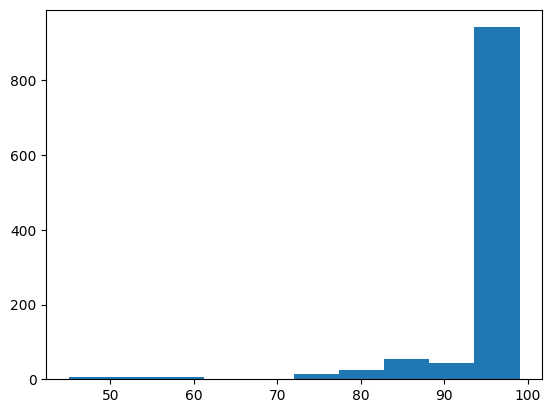

In [185]:
# analysis and validation of fuzzy search results
similarity_scores = [v[1] for v in v_with_more_than_two_desc_term_but_no_match["fuzzy_search_result"]]
plt.hist(similarity_scores)
plt.show()

In [186]:
# view fuzzy search results with score lower or equal than threshhold
similarity_score_threshold = 90
bad_fuzzy_search_results = v_with_more_than_two_desc_term_but_no_match.iloc[[idx for idx, v in enumerate(v_with_more_than_two_desc_term_but_no_match["fuzzy_search_result"]) if v[1] <= similarity_score_threshold]]

# NOTE: the order of the description of a village in the master list is: District, Sector, Cell, Village
for idx, row in bad_fuzzy_search_results.iterrows():
    print("village OV: ", row["BD9 - Village (Umudugudu) - 8062"])
    print("best match from master:", row["fuzzy_search_result"][2])
    print("similarity score:", row["fuzzy_search_result"][1])
    print("\n")

village OV:  kabuye,mugerero,nyakarenzo,rusizi
best match from master: ['rusizi' 'nyakarenzo' 'gatare' 'kabumbwe'
 'kabumbwegatarenyakarenzorusizi']
similarity score: 80


village OV:  kanazi,munini,ruhango,ruhango
best match from master: ['rusizi' 'nkungu' 'ryamuhirwa' 'kinanira'
 'kinaniraryamuhirwankungurusizi']
similarity score: 46


village OV:  nyabisindu,nyabisindu,kimironko,kicukiro
best match from master: ['rusizi' 'nkombo' 'bugarura' 'nyakabanda'
 'nyakabandabugarurankomborusizi']
similarity score: 45


village OV:  mutongo,tara,nyakarenzo,rusizi
best match from master: ['rusizi' 'nyakarenzo' 'rusambu' 'mugongo'
 'mugongorusambunyakarenzorusizi']
similarity score: 81


village OV:  karambi,tara,mururu,rusizi
best match from master: ['rusizi' 'mururu' 'tara' 'karanjwa' 'karanjwataramurururusizi']
similarity score: 85


village OV:  munyove,munyove,giheke,rusizi
best match from master: ['rusizi' 'giheke' 'turambi' 'munyove' 'munyoveturambigihekerusizi']
similarity score: 77


v

#### Correcting wrongly inputted patient's origin with only one or two descriptive term
A fuzzy search is applied on the villages in the catchment area of the hf where the consultation was held.

In [187]:
# import list with correct villages descriptions of each hf
village_correction_by_hf_catchment_dict = pd.read_excel("data/rwanda/village/Village_correction_by_HF_catchment.xlsx", sheet_name=None) # NOTE file provided by domain experts
village_by_hf_catchment = pd.concat([v.assign(hf=k) for k, v in village_correction_by_hf_catchment_dict.items()], ignore_index=True)

# only keep villages in districts rusizi and nyamasheke as these are the only considered districts of the current study (according to domain expert)
village_by_hf_catchment = village_by_hf_catchment.loc[(village_by_hf_catchment["District"] == "Rusizi") | (village_by_hf_catchment["District"] == "Nyamasheke")]
village_by_hf_catchment

,Village,Cell,Sector,District,hf
0,Gashinjano,Cyarukara,Muganza,Rusizi,1_islamic
1,Gashisha,Cyarukara,Muganza,Rusizi,1_islamic
2,Gisozi,Cyarukara,Muganza,Rusizi,1_islamic
3,CitT,Nyange,Bugarama,Rusizi,1_islamic
4,Cyagara,Nyange,Bugarama,Rusizi,1_islamic
...,...,...,...,...,...
3085,Kizenga,Nyagatare,Mahembe,Nyamasheke,38_kibingo
3086,Murundo,Nyagatare,Mahembe,Nyamasheke,38_kibingo
3087,Nyagahima,Nyagatare,Mahembe,Nyamasheke,38_kibingo
3088,Nyakabande,Nyagatare,Mahembe,Nyamasheke,38_kibingo


In [188]:
# normalise hf column: remove underscore and numbers
village_by_hf_catchment["hf"] =  village_by_hf_catchment["hf"].str.replace(r"[\d_]", "")

In [189]:
# normalise: lower case (esepcially important for village, cell, sector, district)
village_by_hf_catchment = village_by_hf_catchment.applymap(lambda s: s.lower() if type(s) == str else s)

In [190]:
# create one string for the village description
# TODO: think about deleting since it has become obsolet. we match based on fuzzy search result on village value and not on willage_one_Word
village_by_hf_catchment["village_one_word"] = village_by_hf_catchment["Village"] + village_by_hf_catchment["Cell"] + village_by_hf_catchment["Sector"] + village_by_hf_catchment["District"]

In [191]:
# get consultations with wrongly inputted patient's origin since they only got one descriptive term
v_with_one_or_two_desc_term_and_no_match = v[( (v["count_desc_values"] == 1) | (v["count_desc_values"] == 2) ) & v["Village_Name"].isna()]
v_with_one_or_two_desc_term_and_no_match[['count_desc_values', 'village_one_word', 'Village_Name', 'Cell_Name', 'Sector_Name', 'District_Name']]

,count_desc_values,village_one_word,Village_Name,Cell_Name,Sector_Name,District_Name
33,1,nyamagana,NaN,NaN,NaN,NaN
36,1,kabumbwe,NaN,NaN,NaN,NaN
46,1,rwinkwavu,NaN,NaN,NaN,NaN
59,2,mubugaka,NaN,NaN,NaN,NaN
98,1,kabageni,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
47968,1,misave,NaN,NaN,NaN,NaN
47980,1,yove,NaN,NaN,NaN,NaN
47999,1,kankuba,NaN,NaN,NaN,NaN
48020,1,mpoga,NaN,NaN,NaN,NaN


In [192]:
# normalise column "health_facility_name": remove whitespaces, RW, CS and text in brackets as well as lowecase final textd
v_with_one_or_two_desc_term_and_no_match["health_facility_name"] = [hf.split(" ")[1].lower() for hf in v_with_one_or_two_desc_term_and_no_match["health_facility_name"]]

In [201]:
# perform fuzzy search to find proper village description from the list of villages that are 5km away from the hf
def fuzzy_search_in_catchment_area(village, hf):
    if not (hf in village_by_hf_catchment["hf"].unique()):
        return "hf not in list"
    villages_in_catchment_area = village_by_hf_catchment[village_by_hf_catchment["hf"] == hf]
    closeness_score = [fuzz.ratio(village, v) for v in villages_in_catchment_area[ "Village"]]
    max_value = max(closeness_score)
    max_index = closeness_score.index(max_value)
    best_match = villages_in_catchment_area.iloc[max_index].values
    return (max_index, max_value, best_match)

In [202]:
v_with_one_or_two_desc_term_and_no_match["fuzzy_search_result"] = v_with_one_or_two_desc_term_and_no_match.apply(lambda row: fuzzy_search_in_catchment_area(row.village_one_word, row.health_facility_name), axis=1)

In [203]:
# viewing fuzzy search result 
# NOTE: the order of the best match of the fuzzy search result is Village, Cell, Sector, District	
v_with_one_or_two_desc_term_and_no_match[["BD9 - Village (Umudugudu) - 8062", "fuzzy_search_result"]]

,BD9 - Village (Umudugudu) - 8062,fuzzy_search_result
33,nyamagana,"(73, 100, [nyamagana, kabuye, nyakarenzo, rusi..."
36,kabumbwe,"(61, 100, [kabumbwe, gatare, nyakarenzo, rusiz..."
46,rwinkwavu,"(28, 100, [rwinkwavu, turambi, giheke, rusizi,..."
59,"mubuga,ka","(7, 86, [mubuga, kacyuma, gashonga, rusizi, mi..."
98,kabageni,"(94, 100, [kabageni, miko, mururu, rusizi, gih..."
...,...,...
47968,misave,"(18, 100, [misave, rusayo, gashonga, rusizi, m..."
47980,yove,"(7, 100, [yove, mutongo, cyato, nyamasheke, yo..."
47999,kankuba,"(46, 100, [kankuba, mashesha, gitambi, rusizi,..."
48020,mpoga,"(83, 100, [mpoga, kamanu, nyakabuye, rusizi, m..."


In [204]:
# NOTE: the order of the best match of the fuzzy search result is Village, Cell, Sector, District
for idx, row in v_with_one_or_two_desc_term_and_no_match.iterrows():
    print("village OV: ", row["BD9 - Village (Umudugudu) - 8062"])
    print("best match from master:", row["fuzzy_search_result"][2])
    print("similarity score:", row["fuzzy_search_result"][1])
    print("\n")

village OV:  nyamagana
best match from master: ['nyamagana' 'kabuye' 'nyakarenzo' 'rusizi' 'nyakarenzo'
 'nyamaganakabuyenyakarenzorusizi']
similarity score: 100


village OV:  kabumbwe
best match from master: ['kabumbwe' 'gatare' 'nyakarenzo' 'rusizi' 'nyakarenzo'
 'kabumbwegatarenyakarenzorusizi']
similarity score: 100


village OV:  rwinkwavu
best match from master: ['rwinkwavu' 'turambi' 'giheke' 'rusizi' 'gihundwe'
 'rwinkwavuturambigihekerusizi']
similarity score: 100


village OV:  mubuga,ka
best match from master: ['mubuga' 'kacyuma' 'gashonga' 'rusizi' 'mibilizi'
 'mubugakacyumagashongarusizi']
similarity score: 86


village OV:  kabageni
best match from master: ['kabageni' 'miko' 'mururu' 'rusizi' 'gihundwe' 'kabagenimikomurururusizi']
similarity score: 100


village OV:  kabayego
best match from master: ['kabayego' 'karangiro' 'nyakarenzo' 'rusizi' 'nyakarenzo'
 'kabayegokarangironyakarenzorusizi']
similarity score: 100


village OV:  karambikabagina
best match from master: 

In [210]:
# expert fuzzy search results based on master list as excel for domain experts
villages_cleaned_by_master_list_fuzzy_search =  v_with_more_than_two_desc_term_but_no_match[["BD9 - Village (Umudugudu) - 8062", "fuzzy_search_result"]]
villages_cleaned_by_master_list_fuzzy_search[['index_master_list', 'similarity_score', "best_match"]] = villages_cleaned_by_master_list_fuzzy_search['fuzzy_search_result'].apply(lambda x: pd.Series(x))
villages_cleaned_by_master_list_fuzzy_search[['best_match_district', 'best_match_sector', "best_match_cell", "best_match_village", "village_one_word"]] = villages_cleaned_by_master_list_fuzzy_search['best_match'].apply(lambda x: pd.Series(x))
villages_cleaned_by_master_list_fuzzy_search[["original_version_village", "original_version_cell", 'original_version_sector', 'original_version_district', "original_version_wrong_fifth_description_term"]] = villages_cleaned_by_master_list_fuzzy_search["BD9 - Village (Umudugudu) - 8062"].str.split(',', expand=True)
villages_cleaned_by_master_list_fuzzy_search["village_name_original_version_matches_catchment_area_list"] = villages_cleaned_by_master_list_fuzzy_search["original_version_village"] == villages_cleaned_by_master_list_fuzzy_search["best_match_village"]
villages_cleaned_by_master_list_fuzzy_search[["original_version_district", "original_version_sector", 'original_version_cell', 'original_version_village', "original_version_wrong_fifth_description_term", 'best_match_district', 'best_match_sector', "best_match_cell", "best_match_village", "similarity_score", "village_name_original_version_matches_catchment_area_list"]].to_excel("data/rwanda/cleaning-villages-results/villages_cleaned_by_master_list_fuzzy_search.xlsx")

In [211]:
# expert fuzzy search results based on catchment area list as excel for domain experts
villages_cleaned_by_hf_catchment_area_fuzzy_search =  v_with_one_or_two_desc_term_and_no_match[["BD9 - Village (Umudugudu) - 8062", "fuzzy_search_result"]]
villages_cleaned_by_hf_catchment_area_fuzzy_search[['index_catchment_area_list', 'similarity_score', "best_match"]] = villages_cleaned_by_hf_catchment_area_fuzzy_search['fuzzy_search_result'].apply(lambda x: pd.Series(x))
villages_cleaned_by_hf_catchment_area_fuzzy_search[['best_match_village', 'best_match_cell', "best_match_sector", "best_match_district", "hf", "village_one_word"]] = villages_cleaned_by_hf_catchment_area_fuzzy_search['best_match'].apply(lambda x: pd.Series(x))
villages_cleaned_by_hf_catchment_area_fuzzy_search["original_version_village"] = villages_cleaned_by_hf_catchment_area_fuzzy_search["BD9 - Village (Umudugudu) - 8062"]
villages_cleaned_by_hf_catchment_area_fuzzy_search["village_name_original_version_matches_catchment_area_list"] = villages_cleaned_by_hf_catchment_area_fuzzy_search["original_version_village"] == villages_cleaned_by_hf_catchment_area_fuzzy_search["best_match_village"]
villages_cleaned_by_hf_catchment_area_fuzzy_search[['original_version_village', 'best_match_district', 'best_match_sector', "best_match_cell", "best_match_village", "similarity_score", "village_name_original_version_matches_catchment_area_list"]].to_excel("data/rwanda/cleaning-villages-results/villages_cleaned_by_hf_catchment_area_fuzzy_search.xlsx")

In [212]:
# to verify that some inputted villages have empty rows in df: village_by_hf_catchment (the reason is that their hf is not in the hf_catchment_area_list)
print(village_by_hf_catchment[village_by_hf_catchment["Village"] == "kivog"] )
v_with_one_or_two_desc_term_and_no_match.loc[v_with_one_or_two_desc_term_and_no_match["BD9 - Village (Umudugudu) - 8062"]== "kivog", ["BD9 - Village (Umudugudu) - 8062", "health_facility_name", "fuzzy_search_result"]]

Empty DataFrame
Columns: [Village, Cell, Sector, District, hf, village_one_word]
Index: []


,BD9 - Village (Umudugudu) - 8062,health_facility_name,fuzzy_search_result
1959,kivog,mont,hf not in list


## suggested cleaning

In [ ]:
# so far nothing

# Data preparation

### Adding another spatial dimension: the patient's origin

In [60]:
# add "patient_village_longitude" and "patient_village_latitude" column which gives the longitude and latitude of the home of the patient who seeked consultation
import shapefile

shape = shapefile.Reader("data/rwanda/village/shapefiles/Village.shp")
#first feature of the shapefile
feature = shape.shapeRecords()[0]
first = feature.shape.__geo_interface__  
print(first) # (GeoJSON format)
#{'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

{'type': 'Polygon', 'coordinates': [[(505804.1074000001, 4784697.3946), (505808.87179999985, 4784688.7454), (505810.1528000003, 4784686.42), (505811.5488999998, 4784683.885500001), (505831.19020000007, 4784642.670600001), (505837.8019000003, 4784632.0306), (505854.10529999994, 4784605.794), (505892.29860000033, 4784586.270400001), (505918.48840000015, 4784576.508300001), (505921.58210000023, 4784574.6291000005), (505938.13049999997, 4784564.577199999), (505961.0466, 4784553.730699999), (505978.5061999997, 4784541.799699999), (505984.42289999966, 4784535.526900001), (505985.4291000003, 4784534.460000001), (505994.8744000001, 4784524.445900001), (505999.0586000001, 4784516.1282), (506002.51269999985, 4784509.261499999), (506001.8514999999, 4784509.054099999), (505981.7786999997, 4784502.7546999995), (505958.8624, 4784502.7553), (505911.9382999996, 4784494.0802), (505891.42540000007, 4784488.983899999), (505890.9107999997, 4784488.8561), (505859.5576999998, 4784481.0668), (505833.36760000

In [63]:
shape_meta = shapefile.Reader("data/rwanda/village/shapefiles/Village.dbf")

In [65]:
len(shape_meta)

14815

In [128]:
shape_meta.fields

[('DeletionFlag', 'C', 1, 0),
 ['District', 'C', 254, 0],
 ['Village_ID', 'C', 50, 0],
 ['Cell_ID', 'C', 50, 0],
 ['Sector_ID', 'C', 50, 0],
 ['Distr_ID', 'C', 50, 0],
 ['Prov_ID', 'C', 50, 0],
 ['Name', 'C', 50, 0],
 ['Cell', 'C', 50, 0],
 ['Sector', 'C', 50, 0],
 ['Province', 'C', 50, 0]]

In [129]:
fieldnames = [f[0] for f in shape_meta.fields[1:]]
fieldnames

['District',
 'Village_ID',
 'Cell_ID',
 'Sector_ID',
 'Distr_ID',
 'Prov_ID',
 'Name',
 'Cell',
 'Sector',
 'Province']

In [130]:
shape_meta.records() # TODO merge this with coordinates

[Record #0: ['Nyarugenge', '11010102', '110101', '1101', '11', '1', 'Gihanga', 'Akabahizi', 'Gitega', 'Kigali Town/Umujyi wa Kigali'],
 Record #1: ['Nyarugenge', '11010103', '110101', '1101', '11', '1', 'Iterambere', 'Akabahizi', 'Gitega', 'Kigali Town/Umujyi wa Kigali'],
 Record #2: ['Nyarugenge', '11010104', '110101', '1101', '11', '1', 'Izuba', 'Akabahizi', 'Gitega', 'Kigali Town/Umujyi wa Kigali'],
 Record #3: ['Nyarugenge', '11010105', '110101', '1101', '11', '1', 'Nyaburanga', 'Akabahizi', 'Gitega', 'Kigali Town/Umujyi wa Kigali'],
 Record #4: ['Nyarugenge', '11010106', '110101', '1101', '11', '1', 'Nyenyeri', 'Akabahizi', 'Gitega', 'Kigali Town/Umujyi wa Kigali'],
 Record #5: ['Nyarugenge', '11010107', '110101', '1101', '11', '1', 'Ubukorikori', 'Akabahizi', 'Gitega', 'Kigali Town/Umujyi wa Kigali'],
 Record #6: ['Nyarugenge', '11010108', '110101', '1101', '11', '1', 'Ubumwe', 'Akabahizi', 'Gitega', 'Kigali Town/Umujyi wa Kigali'],
 Record #7: ['Nyarugenge', '11010109', '110101'

In [68]:
shape_meta.shape(7).__geo_interface__

{'type': 'Polygon',
 'coordinates': [[(505525.9578, 4785103.5688000005),
   (505526.7659, 4785102.5077),
   (505527.2971000001, 4785102.786599999),
   (505532.3876, 4785096.2063),
   (505538.03050000034, 4785091.220799999),
   (505546.80840000045, 4785088.3124),
   (505556.42260000017, 4785088.9352),
   (505559.2207000004, 4785088.9352),
   (505559.28550000023, 4785088.6863),
   (505559.46079999954, 4785087.708799999),
   (505560.64070000034, 4785081.1283),
   (505562.7768000001, 4785069.215299999),
   (505558.57490000036, 4785068.5013999995),
   (505560.2631999999, 4785059.425799999),
   (505561.3216000004, 4785057.3091),
   (505563.96750000026, 4785056.383099999),
   (505564.4754999997, 4785056.4222),
   (505566.3487999998, 4785046.7257),
   (505568.4135999996, 4785040.324899999),
   (505570.85950000025, 4785040.8222),
   (505573.13609999977, 4785030.369899999),
   (505570.5820000004, 4785028.6019),
   (505569.78830000013, 4785026.881899999),
   (505571.11840000004, 4785021.295399999

In [62]:
shape

In [61]:
shape.shapeRecords()

ShapeRecords: [<shapefile.ShapeRecord object at 0x000001C728E2C220>, <shapefile.ShapeRecord object at 0x000001C728E2C4C0>, <shapefile.ShapeRecord object at 0x000001C728E2C130>, <shapefile.ShapeRecord object at 0x000001C728E3BE50>, <shapefile.ShapeRecord object at 0x000001C728E3BF70>, <shapefile.ShapeRecord object at 0x000001C728E3BF40>, <shapefile.ShapeRecord object at 0x000001C728E101F0>, <shapefile.ShapeRecord object at 0x000001C728E10220>, <shapefile.ShapeRecord object at 0x000001C728E10550>, <shapefile.ShapeRecord object at 0x000001C728E10580>, <shapefile.ShapeRecord object at 0x000001C728E108B0>, <shapefile.ShapeRecord object at 0x000001C728E108E0>, <shapefile.ShapeRecord object at 0x000001C728E10C10>, <shapefile.ShapeRecord object at 0x000001C728E10C40>, <shapefile.ShapeRecord object at 0x000001C728E10F10>, <shapefile.ShapeRecord object at 0x000001C728E10F40>, <shapefile.ShapeRecord object at 0x000001C728E11270>, <shapefile.ShapeRecord object at 0x000001C728E112A0>, <shapefile.Sh

## suggested data prep

In [36]:
# add "medical_case_consultation_date_day" column which gives just the data of the consultation day (no time)
rw_data["medical_case_consultation_date_day"] = rw_data["medical_case_consultation_date"].str.slice(0,10)

In [37]:
# add "patient_age" column which gives the age of the patient at the time of consultation in years instead of days like in patient_birthdate
rw_data["patient_age"] = (rw_data["patient_birthdate"] / 365) // 1

# Analysis of consultations in Rwanda

In [ ]:
# analysis of time space of data (= column "medical_case_consultation_date_day")
study_start = rw_data["medical_case_consultation_date_day"].sort_values().iloc[0]
study_end = rw_data["medical_case_consultation_date_day"].sort_values().iloc[-1]
print("Time: used data was collected from", study_start, "till", study_end)

# analysis of geo space of data (= location of health facilities)
print("Geo: data was collected from", rw_data["health_facility_name"].unique().size, "health facilities")

## Demographic of people who seeked consultation
Analyse columns:
1. age: "patient_age" (age in years at consultation) or "patient_birthdate" (age in days at consultation)
2. gender: "patient_gender"
3. origin: "BD9 - Village (Umudugudu) - 8062"
4. columns with diagnosis (= labels for supervised classification)

### General about patients (= people who seeked consultation)

In [ ]:
# number of patients
print("Number of patients in dataset:", rw_data["patient_id"].unique().size)

# number of consultations seeked by patients
rw_data.groupby("patient_id")["medical_case_id"].count().reset_index(name="number_consultations").plot(
    kind="box",
    y="number_consultations",
    title="Number of consultations per patient"
)

In [ ]:
# amount of patients over time --> see consultations over time or gender of patients over time

#### Conclusion - general about patients
- patient_id is not unique since patients can have more than one consultation

### Age

In [ ]:
# analysis of age accross the data set
print(rw_data["patient_age"].describe())

plt.boxplot(rw_data["patient_age"])
plt.title("Patients' age at consultation date")
plt.show()

plt.hist(rw_data["patient_age"])
plt.title("Distribution of patients' age at consultation date")
plt.show()

rw_data.groupby(["patient_age"])["patient_id"].count().reset_index( 
    name="count_age"
    ).plot(
        kind="bar",
        x="patient_age", 
        y="count_age", 
        title="Patients' age at consultation date"
    )


In [ ]:
# patients who were older than 15 years which should not be the case
rw_data[rw_data["patient_age"] > 15]

In [ ]:
# age over time
rw_data.groupby("medical_case_consultation_date_day")["patient_age"].mean().reset_index(
    name="avg_age"
    ).plot(
        x="medical_case_consultation_date_day", 
        y="avg_age", 
        title="Average patient age during consultation over time from " + study_start + " till " + study_end
    )

In [ ]:
# age accross hf locations
rw_data.groupby("health_facility_name")["patient_age"].mean().reset_index(
    name="avg_age"
    ).plot(
        kind="bar",
        x="health_facility_name", 
        y="avg_age", 
        title="Average patient age during consultation of each health facility",
        rot=90
    )

In [ ]:
# age accross hf locations over time
avg_age_per_hf_time = rw_data.groupby(["health_facility_name", "medical_case_consultation_date_day"])["patient_age"].mean().reset_index(name="avg_age")

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in avg_age_per_hf_time.groupby("health_facility_name"):
    data.plot(x="medical_case_consultation_date_day", y="avg_age", ax=ax, label=key)

ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.5))
plt.title("Average patient age during consultation of each health facility over time "+ study_start + " till " + study_end)
plt.show()


#### Conclusion - Age
- age should be always lower than 15, but there are 82 outlier patients who are over 15. Some of them are even over 40.
- looking average age during consultation over time, one can see that the outliers were recorded in 1970 (which is an error itself probably)
- looking at the average age during consultation fp each hf, one can see that the outliers were recorded in RW Nkombo hf

### Gender

In [ ]:
# identify used types of gender
print("types of gender in dataset:", rw_data["patient_gender"].unique())
rw_data.groupby("patient_gender", dropna=False)["patient_id"].count().reset_index(name="count").plot(
    kind="bar",
    x="patient_gender",
    y="count",
    title="Patient's gender during consultation"
)

In [ ]:
# gender over time
gender_per_time = rw_data.groupby(["patient_gender", "medical_case_consultation_date_day"])["patient_id"].count().reset_index(name="count")
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in gender_per_time.groupby("patient_gender"):
    data.plot(x="medical_case_consultation_date_day", y="count", ax=ax, label=key)

plt.title("Number of female and male patients over time" + study_start + " till " + study_end)
plt.show()

In [ ]:
# gender accross hf
gender_per_hf = rw_data.groupby(["health_facility_name", "patient_gender"])["patient_id"].count().reset_index(name="count")

plt.bar(gender_per_hf["health_facility_name"].unique(), gender_per_hf[gender_per_hf["patient_gender"] == "female"]["count"], label="female")
plt.bar(gender_per_hf["health_facility_name"].unique(), gender_per_hf[gender_per_hf["patient_gender"] == "male"]["count"], bottom=gender_per_hf[gender_per_hf["patient_gender"] == "female"]["count"], label="male")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# gender accross hf over time

### Origin

In [ ]:
rw_data["BD9 - Village (Umudugudu) - 8062"]

## Temporal analysis: Consultations over time
Time = medical_case_consultation_date_day (column constructed out of "medical_case_consultation_date")

In [ ]:
# count consultations per day
consultation_count_per_day = rw_data.groupby("medical_case_consultation_date_day")["medical_case_id"].count().reset_index(name="count_consultation")
consultation_count_per_day.plot(x="medical_case_consultation_date_day", y="count_consultation", title="Number of consultations per day from " + study_start + " till " + study_end, rot=90)
# note: 0 in the graph means probably that the app was down for this day

## Spatial analysis: Consultations' locations
Location = 
1. health_facility_name
2. health_facility_id
3. health_facility_latitude & health_facility_longitude

In [ ]:
# count consultations per health facility
consultation_count_per_hf = rw_data.groupby("health_facility_name")["medical_case_id"].count().reset_index(name="count_consultation").sort_values(["count_consultation"], ascending=False)
consultation_count_per_hf.plot(x="health_facility_name", y="count_consultation", kind="bar", title="Number of consultations per health facility from " + study_start + " till " + study_end)

## Spatio-temporal analysis: Consultations' location over time

In [ ]:
# amount of consultations over time across for each health facilities (hf)
consultation_count_per_hf_over_time = rw_data.groupby(["health_facility_name", "medical_case_consultation_date_day"])["medical_case_id"].count().reset_index(name="count_consultation")
for hf in rw_data["health_facility_name"].unique():
    # consultations over time for each hf
    consultation_count_per_hf_over_time[consultation_count_per_hf_over_time["health_facility_name"]==hf].plot(x="medical_case_consultation_date_day", y="count_consultation", title="Number of consultations at "+hf+" over time", rot=90)

# Store RW data after cleaning and preparation

In [38]:
rw_data.to_pickle("data/rw-cleaned-prepared-dynamic-data-phase1.pickle")

# Removing columns
(due to irrelevance for spatio temporal clustering of symptoms according to domain experts)



In [ ]:
# TODO remove columns which did not pass quality control
# NOTE todo has become obsolete

In [ ]:
# TODO remove columns which are not relevant according to domain experts